In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import geopy.distance
from datetime import datetime
%matplotlib inline

As this project is primarily based on visualising the data, the `Ford GoBike System Data` for the year 2017 has been downloaded, unzipped and provided as `bikedata2017.csv` and the code for this process has not been provided

## Preparing Data for analysis

In [33]:
df = pd.read_csv('bikedata2017.csv')
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
519695,435,2017-06-28 10:00:54.5280,2017-06-28 10:08:10.4380,81,Berry St at 4th St,37.775880,-122.393170,45,5th St at Howard St,37.781752,-122.405127,400,Subscriber
519696,431,2017-06-28 09:56:39.6310,2017-06-28 10:03:51.0900,66,3rd St at Townsend St,37.778742,-122.392741,321,5th at Folsom,37.780146,-122.403071,316,Subscriber
519697,424,2017-06-28 09:47:36.3470,2017-06-28 09:54:41.1870,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,48,2nd St at S Park St,37.782411,-122.392706,240,Subscriber
519698,366,2017-06-28 09:47:41.6640,2017-06-28 09:53:47.7150,58,Market St at 10th St,37.776619,-122.417385,59,S Van Ness Ave at Market St,37.774814,-122.418954,669,Subscriber
519699,188,2017-06-28 09:49:46.3770,2017-06-28 09:52:55.3380,25,Howard St at 2nd St,37.787522,-122.397405,48,2nd St at S Park St,37.782411,-122.392706,117,Subscriber


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


Before we ask our questions, let us convert the data to the format which we want.
- I want the date variable to be changed from string format  
- I want the distance in kilometers using the latitude and longitude data for each ride

In [132]:
days_of_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
def convert_to_date_obj_month(time_as_string):
    datetime_object = datetime.strptime(time_as_string, '%Y-%m-%d %H:%M:%S.%f')
    return datetime_object.date().month

def convert_to_date_obj_year(time_as_string):
    datetime_object = datetime.strptime(time_as_string, '%Y-%m-%d %H:%M:%S.%f')
    return datetime_object.date().year

def convert_to_date_obj_day(time_as_string):
    datetime_object = datetime.strptime(time_as_string, '%Y-%m-%d %H:%M:%S.%f')
    return datetime_object.date().day

def convert_to_date_obj_hour(time_as_string):
    datetime_object = datetime.strptime(time_as_string, '%Y-%m-%d %H:%M:%S.%f')
    return datetime_object.time().hour

def convert_to_date_obj_weekday(time_as_string):
    datetime_object = datetime.strptime(time_as_string, '%Y-%m-%d %H:%M:%S.%f')
    return days_of_week[datetime_object.date().weekday()]

months = df.start_time.apply(convert_to_date_obj_month)
months.unique()

array([12, 11, 10,  9,  8,  7,  6,  1,  2,  3,  4,  5])

Clearly, we can see that this has data only from June to December of 2017.  
It would be nice to have 1 year's data.  
We can use data for January-May of 2018, so that we have covered 12 months

In [34]:
temp_df = pd.read_csv('bikedata2018_1.csv')
df = df.append(temp_df)
temp_df = pd.read_csv('bikedata2018_2.csv')
df = df.append(temp_df)
temp_df = pd.read_csv('bikedata2018_3.csv')
df = df.append(temp_df)
temp_df = pd.read_csv('bikedata2018_4.csv')
df = df.append(temp_df)
temp_df = pd.read_csv('bikedata2018_5.csv')
df = df.append(temp_df)

In [35]:
months = df.start_time.apply(convert_to_date_obj_month)
months.unique()

array([12, 11, 10,  9,  8,  7,  6,  1,  2,  3,  4,  5])

Now that we have every month in our dataset, let us create addition columns as per our requirement, for ease of Data Analysis.

First, let us create the ones corresponding to time

In [41]:
df['year'] = df.start_time.apply(convert_to_date_obj_year)
df['month'] = df.start_time.apply(convert_to_date_obj_month)
df['hour'] = df.start_time.apply(convert_to_date_obj_hour)
df['day'] = df.start_time.apply(convert_to_date_obj_weekday)

In [133]:
df['date_day'] = df.start_time.apply(convert_to_date_obj_day)

Now, let us create the one corresponding to distance

In [44]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,year,month,hour,day
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,NaN,2017,12,16,Sunday
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,NaN,2017,12,15,Sunday
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,2017,12,22,Sunday
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,2017,12,17,Sunday
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,NaN,2017,12,14,Sunday


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1142896 entries, 0 to 179124
Data columns (total 20 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             1142896 non-null  int64  
 1   start_time               1142896 non-null  object 
 2   end_time                 1142896 non-null  object 
 3   start_station_id         1142896 non-null  int64  
 4   start_station_name       1142896 non-null  object 
 5   start_station_latitude   1142896 non-null  float64
 6   start_station_longitude  1142896 non-null  float64
 7   end_station_id           1142896 non-null  int64  
 8   end_station_name         1142896 non-null  object 
 9   end_station_latitude     1142896 non-null  float64
 10  end_station_longitude    1142896 non-null  float64
 11  bike_id                  1142896 non-null  int64  
 12  user_type                1142896 non-null  object 
 13  bike_share_for_all_trip  623196 non-null   

In [1]:
dist = []
for i in range(df.shape[0]):
    coords_1 = (df.iloc[i].start_station_latitude, df.iloc[i].start_station_longitude)    
    coords_2 = (df.iloc[i].end_station_latitude, df.iloc[i].end_station_longitude)
    dd = geopy.distance.distance(coords_1, coords_2).km
    #print(i,': ',dd)
    dist.append(dd)

In [56]:
dist = pd.Series(dist)
df['distance'] = dist

In [57]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,year,month,hour,day,distance
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,NaN,2017,12,16,Sunday,0.944876
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,NaN,2017,12,15,Sunday,3.071144
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,2017,12,22,Sunday,0.000000
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,2017,12,17,Sunday,1.044746
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,NaN,2017,12,14,Sunday,0.637772


In [136]:
df.to_csv('bikedatafull.csv')

## Questions  
Let us frame our questions before we start analysing our data
- What is the average duration of each trip?
- What is the average distance of each trip?
- Which month has highest trips?
- Which day has the highest number of trips?
- Any difference in rides between weekdays and weekends?
- Is there a difference between the trips of customers and subscribers?



### Structure of the dataset-

> Post processing, the data set has 1142896 entries with 20 columns. 

### The main feature(s) of interest in the dataset-

> The main features of interest in the dataset given is the duration in seconds, the and the number of trips per month, day and hour of the day 

### Features in the dataset that might help support investigation-

> The user_type as well as the distance will mostly support the investigation

## Univariate Analysis

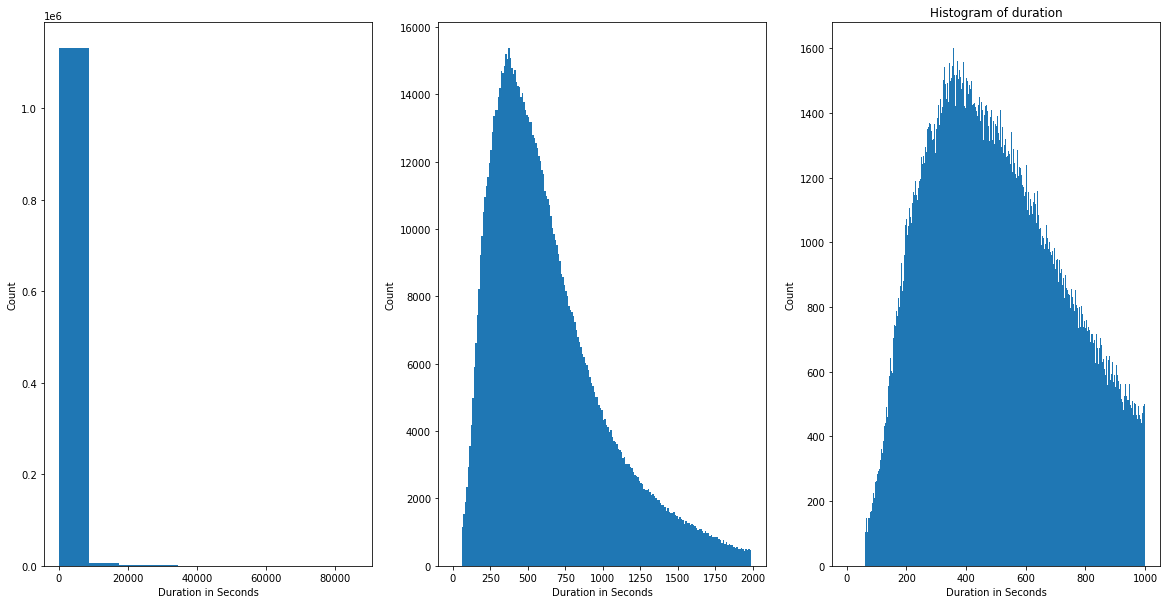

In [93]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(1,3,1)
plt.hist(df.duration_sec);

ax2 = plt.subplot(1,3,2)
bins = np.arange(0,2000,10)
plt.hist(df.duration_sec,bins=bins);

ax3 = plt.subplot(1,3,3)
bins = np.arange(0,1001,1)
plt.hist(df.duration_sec,bins=bins);

ax1.set_xlabel('Duration in Seconds')
ax1.set_ylabel('Count');

ax2.set_xlabel('Duration in Seconds')
ax2.set_ylabel('Count');

ax3.set_xlabel('Duration in Seconds')
ax3.set_ylabel('Count');
plt.title('Histogram of duration');

Here, we can clearly see with the help of the three plots above that the duration of the rides are skewed to the left, helping us understand that there are a large number of rides with time between 250-1500 seconds.

Text(0.5, 1.0, 'Histogram of Distance')

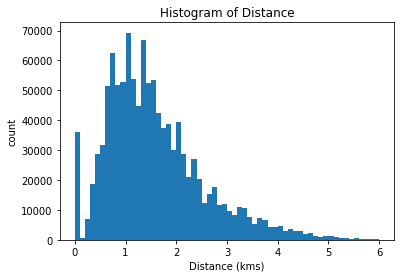

In [95]:
bins = np.arange(0,6+0.1,0.1)
plt.hist(df.distance,bins=bins);
plt.xlabel('Distance (kms)')
plt.ylabel('count');
plt.title('Histogram of Distance');

Here too, we can see that the distribution of the distances for the rides are right skewed. This seems to be unimodal with a peak at around 1~1.3kms

Text(0.5, 1.0, 'Bar Plot of number of rides each day')

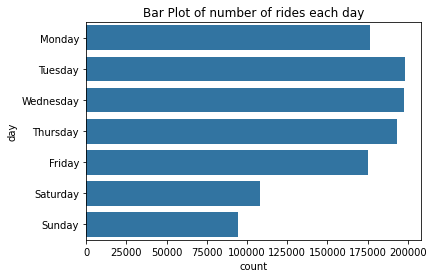

In [94]:
#fig = plt.figure(figsize=(10,10))
base_color = sb.color_palette()[0]
sb.countplot(data = df,y = 'day',color = base_color, order = days_of_week)
plt.title('Bar Plot of number of rides each day');

This analysis gave us a clear picture that the number of rides on weekends is lesser than the number of rides in weekdays

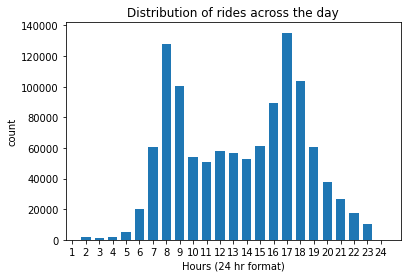

In [96]:
bin_edges = np.arange(1.5, 24.5+1, 1)
plt.hist(df.hour, bins = bin_edges, rwidth = 0.7);
plt.xticks(np.arange(1, 24+1, 1));
plt.xlabel('Hours (24 hr format)')
plt.ylabel('count');
plt.title('Distribution of rides across the day');

This is a clear bimodal distribution with peaks at 8 in the morning and at 5 in the evening. This trend must be analysed further!

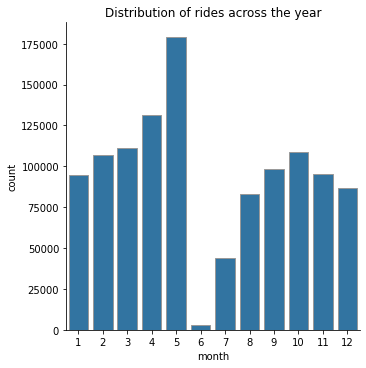

In [155]:
sb.catplot(x="month", kind="count",color = base_color, edgecolor=".6",data=df);
plt.title('Distribution of rides across the year');

In [135]:
df.query('month == 6').day.unique()

array(['Friday', 'Thursday', 'Wednesday'], dtype=object)

In [134]:
df.query('month == 6').date_day.unique()

array([30, 29, 28])

This plot clearly shows us that there is some data that has not been recorded in the 6th month of the year. The Data was extracted only for the last 3 days of June!!!

### The distributions of variables of interest. 

> The distributions of the distance and the duration are left skewed. However no transformations are performed on these.  
> The number of observations for the month of June was very low, and on further investigation showed that only data for 3 days was extracted

### Unusual / Interesting distributions

> Of the features investigated, the distribution of rides across the day was unique (clearly bimodal) and this is to be investigated further.   
> Also, the number of rides on weekdays and weekends are clearly different

In [130]:
# station_pairs = []
# for i in range(df.shape[0]):
#     temp = str(df.iloc[i].start_station_id) + '-' + str(df.iloc[i].end_station_id)
#     station_pairs.append(temp)
    

## Bivariate Analysis

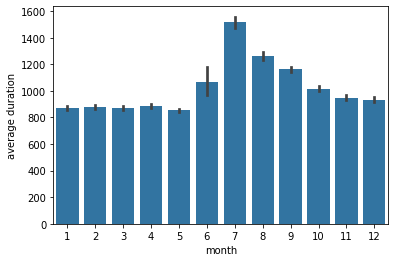

In [113]:
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'month', y = 'duration_sec', color = base_color);
plt.ylabel('average duration');

From this we see that the average duration of the trips is maximum in July.  
Also, there is maximum error on the month of June because of the lesser number of observations

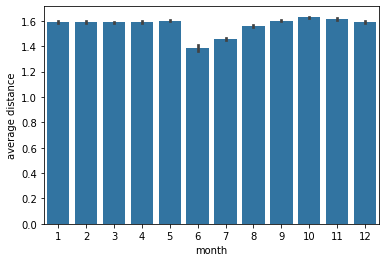

In [115]:
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'month', y = 'distance',color = base_color);
plt.ylabel('average distance');

The average distance is almost equal for all months. This does not give much insight into the data

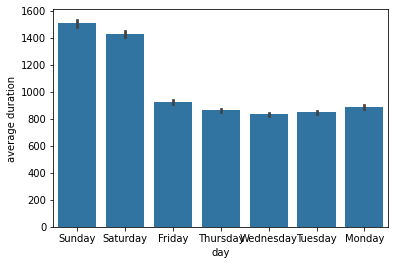

In [119]:
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'day', y = 'duration_sec',color = base_color);
plt.ylabel('average duration');

There is a clear difference in the mean duration of rides in weekdays and weekends, with the weekends in general having longer rides

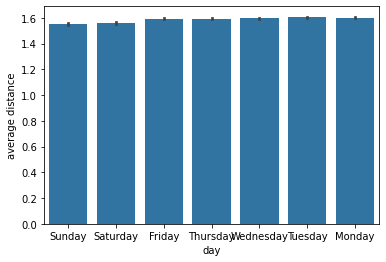

In [156]:
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'day', y = 'distance',color = base_color);
plt.ylabel('average distance');

From this graph we can see that there is a small difference in the average distance of trips in weekdays and weekends, with the weekends being slightly lesser

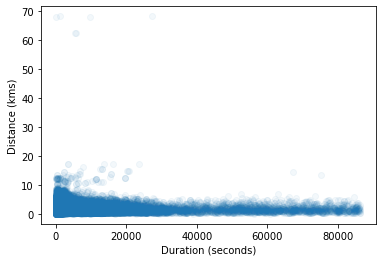

In [110]:
df_temp = df.query('distance != 0')
plt.scatter(data = df_temp, x = 'duration_sec', y = 'distance',alpha=1/20);
plt.xlabel('Duration (seconds)')
plt.ylabel('Distance (kms)');

For the same distance, there is a huge variation in duration. We can't decipher a clear relationship between these two variables from this graph.

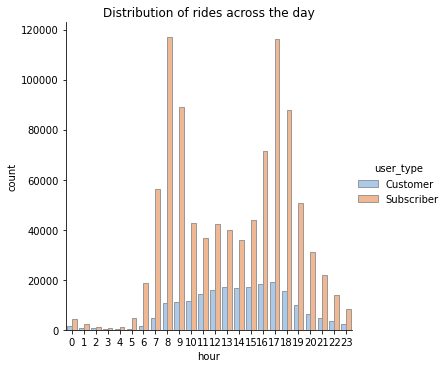

In [140]:
#bin_edges = np.arange(1.5, 24.5+1, 1)
sb.catplot(x="hour", hue="user_type", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.title('Distribution of rides across the day');

This graph is really important as it shows us that the bimodality seen in the univatiate analysis is due to Subscribers predominantly.

### Unusual / Interesting relationships

> The relationship between the type of user and the distribution of rides across the day is very interesting
> The relationship between the day of the week and the average duration of the ride is really interesting

## Multivariate Analysis

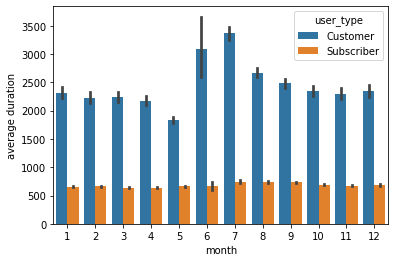

In [142]:
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'month', y = 'duration_sec', hue="user_type");
plt.ylabel('average duration');

This graph clearly shows us that the average duration of the rides is very different for customers and subscribers.
The subscribers' ride times are much lesser on average

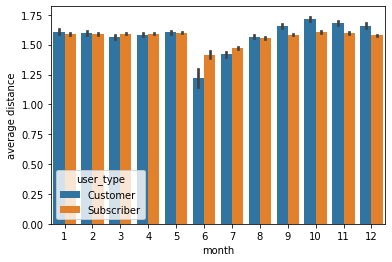

In [144]:
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'month', y = 'distance', hue="user_type");
plt.ylabel('average distance');

In continuation with the observation from the previous graph, we can see that the average distance travelled by both customers and subscribers are the same. Yet, the average time is lesser for the latter

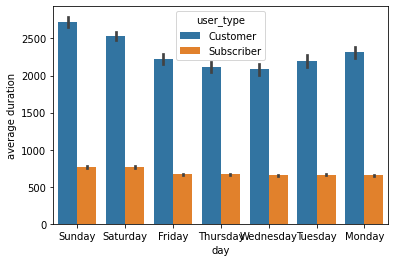

In [149]:
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'day', y = 'duration_sec', hue="user_type");
plt.ylabel('average duration');

Now considering the average duration w.r.t days of the week, we see the same trend as in observation 1 of multi-variate analysis.

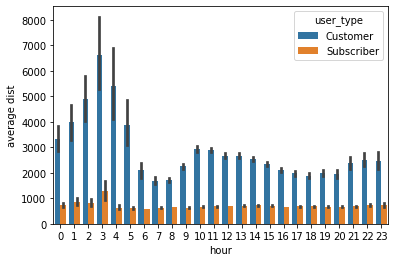

In [160]:
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'hour', y = 'duration_sec', hue="user_type");
plt.ylabel('average dist');

Along the same lines, it is interesting to note that the duration of the ride is lesser for subscribers at any time of the day on average

### Unusual / Interesting relationships

> The relationship between the type of user and the duration of rides across the year/week/day is very interesting  
> Even for subscribers, the duration of trips in weekends is longer on average